In [10]:

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import sys
from itertools import compress
import matplotlib.colors as clr
from math import pi


sys.path.append("scripts/")
import scripts.conf as conf
import scripts.oncotree
conf.config_params()
oncotree = scripts.oncotree.Oncotree()

os.makedirs("raw_plots",exist_ok=True)
os.makedirs("source_data",exist_ok=True)

### First, create the source data

In [11]:
if not(os.path.exists(f"source_data/observed_mutations_with_shapleys_EGFR_LUAD.tsv")) or not(os.path.exists(f"source_data/observed_mutations_with_shapleys_EGFR_GBM.tsv")):
    !python scripts/prepare_tables_all_mutations.py 

sys:1: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.


# Figure 2a, radar plots.

In [12]:
def plot_radar_mutation(features,values,drivers,path_output):
    # Definition of variables 
    fig = plt.subplots(figsize=(1.,1.))
    categories=features
    degron = "_GLOBAL_VALUE"

    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)
    ax.spines['polar'].set_visible(False)
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    ax.vlines(angles[:-1], 0, [3 for x in range(len(angles[:-1]))], colors="#DCDCDC", zorder=3,linewidth=0.5,alpha=0.5) 
    # Draw ylabels
    ax.set_rlabel_position(0)
    maxv = int(np.amax(values))+1
    minv = int(np.amin(values))-1
    plt.ylim(minv,maxv)
    plt.yticks(np.arange(minv,maxv+1,1), np.arange(minv,maxv+1,1), color="black", size=5)
    values +=  values[:1]
    #ax.plot(angles, values, linewidth=1.15, linestyle='solid', label="Drivers",color="#a64040ff")
    
    # Drivers
    values_true = list(compress(list(values),list(drivers)))
    # plot each value
    for case in values_true:
        case = list(case)
        case += case[:1]
        ax.plot(angles, case, linewidth=0.25, linestyle='solid', label="Drivers",color="#a64040ff")
    
    ax.grid(b=None,axis="x")
    ax.grid(axis="y",lw=0.25)
    
    # Draw one axe per variable + add labels labels yet
    print (name)
    _=plt.xticks(angles[:-1], [conf.name_features[x]  for x in features],fontsize=4)
    plt.savefig(path_output,dpi=800,bbox_inches="tight")
    plt.show()
    


### Plot them

raw_plots/all_drivers_EGFR__LUAD.svg


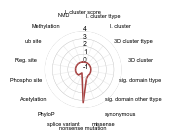

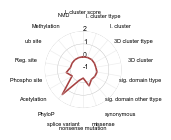

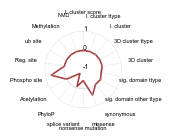

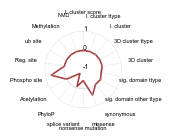

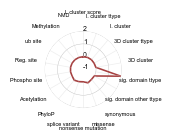

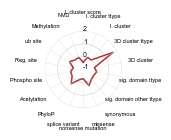

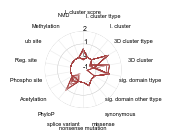

raw_plots/all_drivers_EGFR__GBM.svg


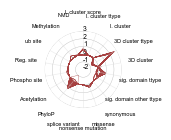

In [19]:
gene = "EGFR"
for ttype in ["LUAD","GBM"]:
    df_data = pd.read_csv(f"source_data/observed_mutations_with_shapleys_EGFR_{ttype}.tsv",sep="\t")
    drivers = df_data[(df_data["boostDM_class"])]
    values = list(drivers[conf.features].values)
    drivers = list(drivers["boostDM_class"].values)
    name = os.path.join("raw_plots","all_drivers"+"_"+gene+"_"+"_"+ttype+".svg")
    plot_radar_mutation(conf.features,values,drivers,name)

### function to plot per color

In [20]:
def to_hex(a,b,c):
    return '#%02x%02x%02x' % (int(a*255), int(b*255), int(c*255))
def create_scale(maxv,minv):
    maxv = np.nanmax(maxv) 
    minv = np.nanmin(minv)
    norm = clr.Normalize(vmin=minv,vmax=maxv)
    sm = plt.cm.ScalarMappable(cmap=plt.cm.RdBu_r, norm=norm)
    return sm
def get_colors(row,scales):
    colors = []
    for i in range(0,len(row)):
        sm = scales[i]
        colors.append(to_hex(*sm.to_rgba(row[i])[0:3]))
    return colors

### Function to plot radar for a single mutation

In [21]:
def plot_radar_single_mutation(features,values,drivers,path_output):
    # Definition of variables 
    fig = plt.subplots(figsize=(1.,1.))
    categories=features
    degron = "_GLOBAL_VALUE"

    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)
    ax.spines['polar'].set_visible(False)
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    ax.vlines(angles[:-1], 0, [3 for x in range(len(angles[:-1]))], colors="#DCDCDC", zorder=3,linewidth=0.5,alpha=0.5) 
    # Draw ylabels
    ax.set_rlabel_position(0)
    maxv = int(np.amax(values))+1
    minv = int(np.amin(values))-1
    plt.ylim(minv,maxv)
    plt.yticks(np.arange(minv,maxv+1,1), np.arange(minv,maxv+1,1), color="black", size=5)
    values +=  values[:1]
    ax.plot(angles, values, linewidth=1.15, linestyle='solid', label="Drivers",color="#a64040ff")
    ax.grid(b=None,axis="x")
    ax.grid(axis="y",lw=0.25)
    
    # Draw one axe per variable + add labels labels yet
    _=plt.xticks(angles[:-1], [conf.name_features[x]  for x in features],fontsize=4)
    plt.savefig(path_output,dpi=800,bbox_inches="tight")
    


In [22]:
path_saturation=os.path.join(conf.output_boostdm,"saturation","prediction")

### Individual examples, Figure 2B

In [23]:
examples = [("RB1","E51*","BLCA"),("VHL","S80R","RCCC"),("CIC","R202W","LGG"),("TP53","K132R","LUSC")]

In [24]:
for gene,mut,ttype in examples:
    path_file = os.path.join(path_saturation,f"{gene}.{ttype}.prediction.tsv.gz")
    df_data = pd.read_csv(path_file,sep="\t")
    df_data[(df_data["boostDM_class"])&(df_data["gene"]==gene)&(df_data["aachange"]==mut)].to_csv(f"source_data/{gene}_{ttype}_{mut}_radar_source.tsv",sep="\t")
    muts = df_data[(df_data["boostDM_class"])&(df_data["gene"]==gene)&(df_data["aachange"]==mut)]["aachange"].unique()
    for mut in muts:
        df = df_data[df_data["aachange"]==mut].drop_duplicates()
        for i,r in df.iterrows():
            selected_model = r["selected_model_ttype"]
            selected_model_gene = r["selected_model_gene"]
            gene = r["gene"]
            values = [r.loc[feature] for feature in conf.features]
            drivers = [r["boostDM_class"]]
            name = os.path.join("raw_plots",gene+"_"+mut+"_"+ttype+".svg")
            plot_radar_single_mutation(conf.features,values,drivers,name)